In [1]:
import numpy as np
import pandas as pd
import librosa
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

We have used TESS dataset, CREMA-D dataset, RAVDESS dataset

**Data Preprocessing**

In [2]:
# # Check if the feature extraction function is returning valid features
# def extract_features(file_name):
#     try:
#         audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
#         mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#         mfccs_scaled = np.mean(mfccs.T, axis=0)
#         return mfccs_scaled
#     except Exception as e:
#         print("Error encountered while parsing file: ", file_name)
#         return None

# # Test the function with one file
# sample_file = os.path.join("C:/Users/Lenovo/OneDrive/Desktop/SpeechEmotion/Organised_CREMA-D", 'anger', '1001_DFA_ANG_XX.wav')
# features = extract_features(sample_file)
# print(f"Features for {sample_file}: {features}")


In [3]:
# # Print the data path and directory structure
# print(f"Data Path: {data_path}")
# print(f"Directory Structure: {os.listdir(data_path)}")
# for emotion in os.listdir(data_path):
#     print(f"{emotion} files: {os.listdir(os.path.join(data_path, emotion))[:5]}")

In [4]:
# Function to load audio files and extract features
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        return mfccs_scaled
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None

In [5]:
# Data loading and preprocessing
def load_data(data_path):
    features = []
    for emotion in os.listdir(data_path):
        emotion_path = os.path.join(data_path, emotion)
        if os.path.isdir(emotion_path):
            for file_name in tqdm(os.listdir(emotion_path)):
                if file_name.endswith('.wav'):
                    feature = extract_features(os.path.join(emotion_path, file_name))
                    if feature is not None:
                        features.append([feature, emotion])
    
    return pd.DataFrame(features, columns=['feature', 'emotion'])

In [6]:
data_path = 'C:/Users/Lenovo/OneDrive/Desktop/SpeechEmotion/Organised_CREMA-D'  # Update with your path
data = load_data(data_path)

100%|██████████| 9315/9315 [02:29<00:00, 62.25it/s]


In [7]:
# Check if data is loaded correctly
print(f"Data loaded: {data.shape[0]} samples")
if data.empty:
    print("Data loading failed. No data found.")
else:
    print(data.head())

Data loaded: 54490 samples
                                             feature emotion
0  [-683.20245, 64.19206, -5.3122115, 17.506668, ...   anger
1  [-681.3284, 65.7901, -3.123772, 19.140762, 5.4...   anger
2  [-309.91708, 4.3345914, 4.90794, 4.2519927, 1....   anger
3  [-697.06793, 65.16272, -2.8511467, 19.831451, ...   anger
4  [-708.91943, 64.588356, -1.2230228, 19.841986,...   anger


In [8]:
data.head()

,feature,emotion
0,"[-683.20245, 64.19206, -5.3122115, 17.506668, ...",anger
1,"[-681.3284, 65.7901, -3.123772, 19.140762, 5.4...",anger
2,"[-309.91708, 4.3345914, 4.90794, 4.2519927, 1....",anger
3,"[-697.06793, 65.16272, -2.8511467, 19.831451, ...",anger
4,"[-708.91943, 64.588356, -1.2230228, 19.841986,...",anger


In [9]:
# Encode the labels
le = LabelEncoder()
data['emotion'] = le.fit_transform(data['emotion'])
X = np.array(data['feature'].tolist())
y = np.array(data['emotion'].tolist())

# Check if X and y are populated correctly
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (54490, 40)
Labels shape: (54490,)


In [10]:
# Convert labels to categorical
y = to_categorical(y)

In [11]:
print(y)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [12]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (40867, 40), (40867, 6)
Test data shape: (13623, 40), (13623, 6)


**Data Visualization**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21732\981048768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=le.inverse_transform(emotion_counts.index), y=emotion_counts, palette=palette)


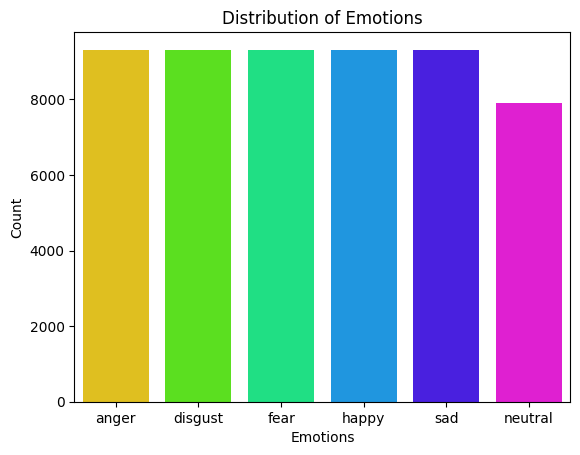

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the count of each emotion
emotion_counts = data['emotion'].value_counts()
palette = sns.color_palette("hsv", len(emotion_counts))
sns.barplot(x=le.inverse_transform(emotion_counts.index), y=emotion_counts, palette=palette)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()


**Data Augmentation**

In [15]:
# import librosa
# import soundfile as sf

In [16]:
# dataset_path = 'C:/Users/Lenovo/OneDrive/Desktop/SpeechEmotion/Organised_CREMA-D'

In [17]:
# # Function to augment audio data
# def augment_data(audio, sample_rate):
#     # Add white noise
#     noise = np.random.randn(len(audio))
#     audio_noise = audio + 0.005 * noise
    
#     # Time stretching
#     audio_stretch = librosa.effects.time_stretch(audio, rate=0.8)
    
#     # Pitch shifting
#     audio_shift = librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=2)
    
#     return [audio, audio_noise, audio_stretch, audio_shift]

# # Iterate through each emotion folder
# for emotion_folder in os.listdir(dataset_path):
#     emotion_path = os.path.join(dataset_path, emotion_folder)
#     if os.path.isdir(emotion_path):
#         for filename in os.listdir(emotion_path):
#             if filename.endswith('.wav'):
#                 # Source path
#                 src = os.path.join(emotion_path, filename)
                
#                 # Load the audio file
#                 audio, sample_rate = librosa.load(src, res_type='kaiser_fast')
                
#                 # Perform data augmentation
#                 augmented_audios = augment_data(audio, sample_rate)
                
#                 # Save the original and augmented audio files to the same folder with modified names
#                 for i, augmented_audio in enumerate(augmented_audios):
#                     augmented_filename = f"{filename.split('.wav')[0]}_aug{i}.wav"
#                     dst = os.path.join(emotion_path, augmented_filename)
#                     sf.write(dst, augmented_audio, sample_rate)
#                     print(f'Saved {augmented_filename} in {emotion_folder} folder')

# print('Data augmentation completed successfully.')

In [18]:
# # Add these features to your training data
# X_augmented = np.array(features)
# y_augmented = np.array([label] * len(features))  # Assuming 'label' is the correct label for this audio

# X_train = np.vstack((X_train, X_augmented))
# y_train = np.hstack((y_train, y_augmented))

**Model Building**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM, Dense, Flatten
from tensorflow.keras.regularizers import l2

In [20]:
# Model architecture with more layers and increased capacity
model = Sequential()

# Convolutional layers
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(40, 1), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(512, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(LSTM(128, return_sequences=False, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

# Flatten layer to transition from LSTM to Dense
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(y.shape[1], activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 128)           512       
                                                                 
 batch_normalization (BatchN  (None, 38, 128)          512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 256)           98560     
                                                                 
 batch_normalization_1 (Batc  (None, 17, 256)          1

In [22]:
# Reshape X_train and X_test for Conv1D layer
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test),verbose=1)

Epoch 1/100
639/639 [==============================] - 33s 44ms/step - loss: 3.3701 - accuracy: 0.3260 - val_loss: 2.5177 - val_accuracy: 0.4881
Epoch 2/100
639/639 [==============================] - 29s 45ms/step - loss: 2.3032 - accuracy: 0.4522 - val_loss: 1.9361 - val_accuracy: 0.5115
Epoch 3/100
639/639 [==============================] - 29s 45ms/step - loss: 1.8586 - accuracy: 0.4828 - val_loss: 1.6589 - val_accuracy: 0.5237
Epoch 4/100
639/639 [==============================] - 29s 45ms/step - loss: 1.6459 - accuracy: 0.4919 - val_loss: 1.5074 - val_accuracy: 0.5274
Epoch 5/100
639/639 [==============================] - 29s 45ms/step - loss: 1.5280 - accuracy: 0.5000 - val_loss: 1.4374 - val_accuracy: 0.5273
Epoch 6/100
639/639 [==============================] - 30s 47ms/step - loss: 1.4968 - accuracy: 0.5024 - val_loss: 1.4598 - val_accuracy: 0.5127
Epoch 7/100
639/639 [==============================] - 28s 44ms/step - loss: 1.4798 - accuracy: 0.5047 - val_loss: 1.4296 - val_ac

In [25]:
# Evaluate the model
score = model.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"Test accuracy: {score[1]}")

426/426 [==============================] - 3s 7ms/step - loss: 1.1605 - accuracy: 0.6250
Test accuracy: 0.6249724626541138


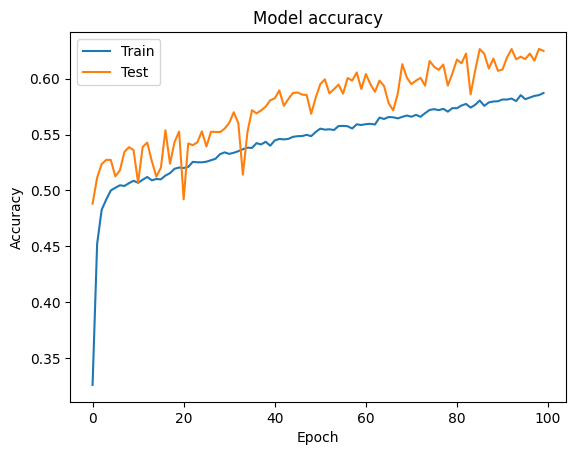

In [26]:
# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

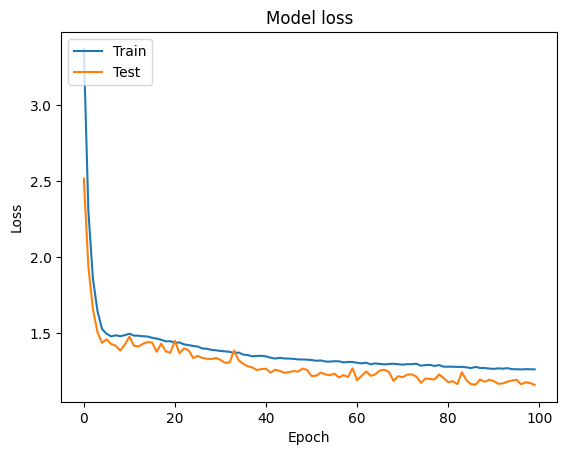

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**RNN model**

In [28]:
# RNNs expect input data to be 3D tensors of shape (samples, timesteps, features)
timesteps = 40  # Number of MFCC features

# Reshape features for RNN input
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_val_rnn = np.expand_dims(X_test, axis=-1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [30]:
def build_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    model.add(LSTM(128))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
    return model

In [31]:
# Define input shape
input_shape_rnn = (timesteps, 1)
num_classes = y_train.shape[1]

In [32]:
# Build and train the RNN model
rnn_model = build_rnn_model(input_shape_rnn, num_classes)
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 40, 128)           66560     
                                                                 
 dropout_7 (Dropout)         (None, 40, 128)           0         
                                                                 
 batch_normalization_5 (Batc  (None, 40, 128)          512       
 hNormalization)                                                 
                                                                 
 lstm_3 (LSTM)               (None, 40, 128)           131584    
                                                                 
 dropout_8 (Dropout)         (None, 40, 128)           0         
                                                                 
 batch_normalization_6 (Batc  (None, 40, 128)          512       
 hNormalization)                                      

In [34]:
# Train the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, validation_data=(X_val_rnn, y_test), epochs=100, batch_size=64)

Epoch 1/100
639/639 [==============================] - 73s 114ms/step - loss: 1.2544 - accuracy: 0.4834 - val_loss: 1.1761 - val_accuracy: 0.5169
Epoch 2/100
639/639 [==============================] - 75s 117ms/step - loss: 1.1913 - accuracy: 0.5099 - val_loss: 1.2239 - val_accuracy: 0.4943
Epoch 3/100
639/639 [==============================] - 80s 124ms/step - loss: 1.1565 - accuracy: 0.5245 - val_loss: 1.1253 - val_accuracy: 0.5409
Epoch 4/100
639/639 [==============================] - 81s 127ms/step - loss: 1.1305 - accuracy: 0.5393 - val_loss: 1.1099 - val_accuracy: 0.5467
Epoch 5/100
639/639 [==============================] - 81s 126ms/step - loss: 1.1163 - accuracy: 0.5473 - val_loss: 1.0688 - val_accuracy: 0.5658
Epoch 6/100
639/639 [==============================] - 80s 125ms/step - loss: 1.0947 - accuracy: 0.5570 - val_loss: 1.1226 - val_accuracy: 0.5502
Epoch 7/100
639/639 [==============================] - 81s 127ms/step - loss: 1.0736 - accuracy: 0.5668 - val_loss: 1.0747 -

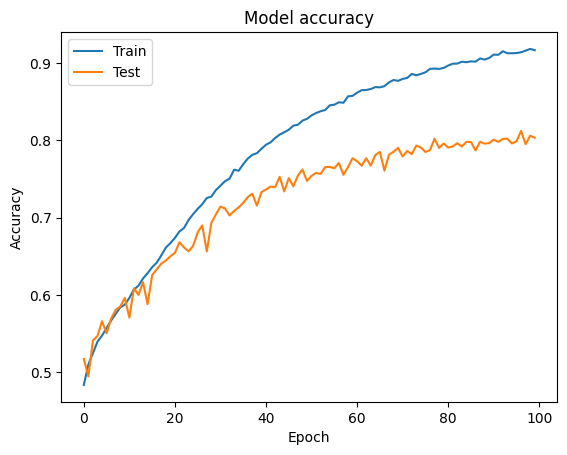

In [35]:
# # Plot the training history
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

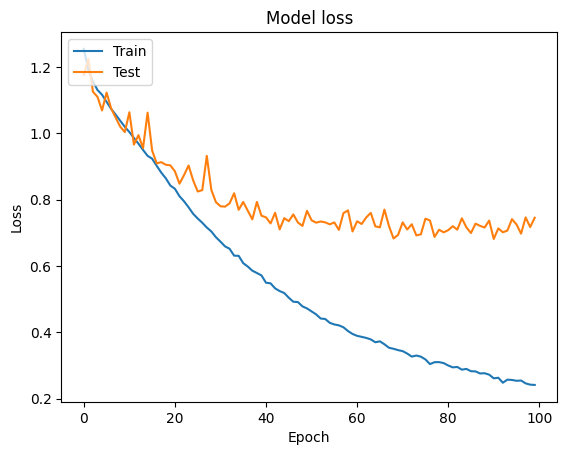

In [36]:
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
# Evaluate the model
score = rnn_model.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"RNN Model :- Test accuracy: {score[1]}")

426/426 [==============================] - 7s 17ms/step - loss: 0.7453 - accuracy: 0.8033
RNN Model :- Test accuracy: 0.8033472895622253


**RNN model:**

Accuracy = 91.66%

Validation Accuracy = 80.33%

**We are going to choose RNN model for our project further**

In [38]:
# Save the trained RNN model
rnn_model_path = 'trained_rnn_model01.h5'
rnn_model.save(rnn_model_path)